In [ ]:
! git clone https://github.com/microsoft/unilm.git
! cd unilm/beit2 ; pip install -r requirements.txt

! pip install mmcv-full==1.3.0 mmsegmentation==0.11.0
! pip install scipy timm==0.3.2

In [2]:
# * Download model weights
# !wget https://conversationhub.blob.core.windows.net/beit-share-public/beitv2/beitv2_base_patch16_224_pt1k_ft21ktoade20k.pth
!wget https://conversationhub.blob.core.windows.net/beit-share-public/beitv2/beitv2_large_patch16_224_pt1k_ft21ktoade20k.pth

--2022-10-23 17:46:06--  https://conversationhub.blob.core.windows.net/beit-share-public/beitv2/beitv2_large_patch16_224_pt1k_ft21ktoade20k.pth
Resolving conversationhub.blob.core.windows.net (conversationhub.blob.core.windows.net)... 52.191.176.36
Connecting to conversationhub.blob.core.windows.net (conversationhub.blob.core.windows.net)|52.191.176.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1963518987 (1.8G) [application/octet-stream]
Saving to: ‘beitv2_large_patch16_224_pt1k_ft21ktoade20k.pth’

beitv2_large_patch1 100%[===================>]   1.83G  19.2MB/s    in 80s     

2022-10-23 17:47:26 (23.5 MB/s) - ‘beitv2_large_patch16_224_pt1k_ft21ktoade20k.pth’ saved [1963518987/1963518987]



In [ ]:
# * Download test data, can be replaced
! wget https://github.com/divamgupta/datasets/releases/download/seg/dataset1.zip && unzip dataset1.zip

In [4]:
import sys
sys.path.append('unilm/beit2/semantic_segmentation')

In [5]:
# from pathlib import Path
# import mmcv
# from mmseg.models import build_segmentor
# from mmseg.datasets import build_dataloader, build_dataset
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
# from mmseg.core.evaluation import get_palette
# from mmcv.runner import load_checkpoint
from backbone import beit

import numpy as np

apex is not installed
apex is not installed
apex is not installed
apex is not installed


In [6]:
config_file = 'unilm/beit2/semantic_segmentation/configs/beit/upernet/upernet_beit_large_24_512_slide_160k_21ktoade20k.py'
checkpoint_file = 'beitv2_large_patch16_224_pt1k_ft21ktoade20k.pth'
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

Use load_from_local loader


In [7]:
img = 'dataset1/images_prepped_test/0016E5_07959.png'
result = inference_segmentor(model, img)

/opt/conda/lib/python3.7/site-packages/mmseg/models/segmentors/base.py:267: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


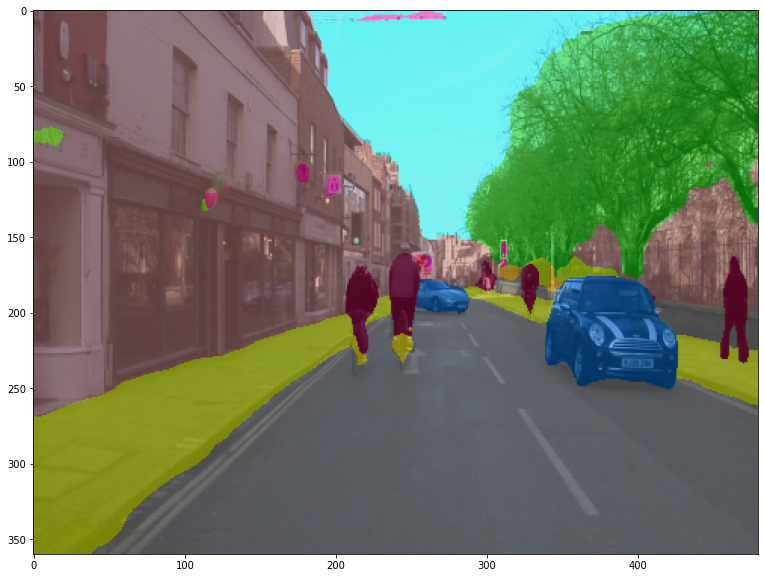

In [8]:
show_result_pyplot(model, img, result)

In [9]:
result = np.array(result)

In [10]:
result.shape

(1, 360, 480)